In [ ]:
# final exam -4 MLPclassfier 


In [1]:
import csv
import numpy as np
from scipy import stats
import math
from numpy.linalg import inv, norm, pinv
import random
# I found it difficult ot de compress it in jupyter so I used Linux convert them into csv files
Tr = np.loadtxt(open("//home//gaurav//Documents//assignment3//mnist_train.csv", "rb"), delimiter=",")
Tx = np.loadtxt(open("/home/gaurav/Documents/assignment3/mnist_test.csv", "rb"), delimiter=",")
print("Size of the training set:-")
print(Tr.shape)
print("Size of the Testing set:-")
print(Tx.shape)
print("Size of the Testing Labes:-")

##########################################################
# divide the Training sets to seperate the labels and the images 
Trl=Tr[:,0]                 # Training labels 
Trd=Tr[:,1:]                # Training data 
Tr0 = []
Tr0l=[]
Txl=Tx[:,0]                 # Testing labels 
Txd=Tx[:,1:]                #testing data

####################

Size of the training set:-
(60000, 785)
Size of the Testing set:-
(10000, 785)
Size of the Testing Labes:-


In [ ]:
from sklearn.svm import LinearSVC
Lsvc1 = LinearSVC(C=2,dual=False)
Lsvc1.fit(Trd, Trl) # Trainig set data and Training Labels 

print(Lsvc1.coef_)

#  Use this classifier to predict the labels on test set and also on the training set 
# predtx = Lsvcl.predict(Txd) # predictions on the testing set 
# predtr = Lsvcl.predict(Trd) # predictions on the training set 



In [ ]:
from sklearn.metrics import confusion_matrix

predtx = Lsvc1.predict(Txd) # predictions on the testing set 
predtr = Lsvc1.predict(Trd)
print(predtx)
print(Txl)
cmat_Lsvc = confusion_matrix(predtr,Trl)
print(cmat_Lsvc)
trainAcc_Array = []
testAcc_Array = []



[ 7.  2.  1. ...,  4.  5.  6.]
[ 7.  2.  1. ...,  4.  5.  6.]
[[5804    2   41   22    7   47   31   11   45   28]
 [   1 6606   41   25   23   20    9   18  118   17]
 [  13   30 5421  153   30   39   32   56   69   24]
 [   9   13   86 5500    7  162    2   15  148  106]
 [   8    7   57   11 5495   67   27   57   38  178]
 [  18   20   25  166   12 4791   77    8  167   45]
 [  28    2   62   19   31   94 5705    3   51    2]
 [   2   11   67   53   15   18    2 5913   23  190]
 [  37   43  140  118   50  124   30   15 5103   48]
 [   3    8   18   64  172   59    3  169   89 5311]]


0.001
Training Accuracy
92.7716666667
Testing Accuracy
91.81
0.1
Training Accuracy
92.775
Testing Accuracy
91.71
1.0
Training Accuracy
92.7483333333
Testing Accuracy
91.71
10.0
Training Accuracy
92.7583333333
Testing Accuracy
91.73
100.0
Training Accuracy
92.7516666667
Testing Accuracy
91.75


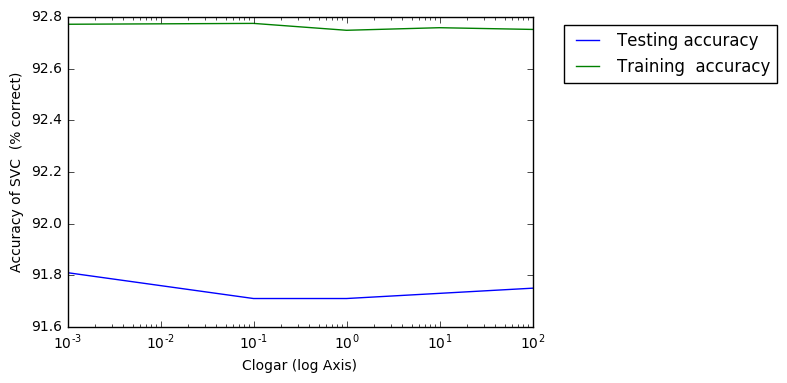

[603.9051481589995, 1089.7816775149986, 967.8614579729983, 976.2215545859945, 1035.533017519003]


In [2]:
from sklearn.svm import LinearSVC
from sklearn import metrics
import timeit
import matplotlib.pyplot as plt
# i) (10) Plot overall training and testing accuracy versus input parameter C on the same plot. 
# Comment on the bias and variance of the classifier at different values of C.
# (It might help to plot C on a log axis.) Which value of C would you choose based on this plot

def fuclinearSVC(K):
    # train the SVC with the given c with the other default parameters
    print(K)
    stime = timeit.default_timer()
    Lsvc = LinearSVC(C=K, dual=False) 
    Lsvc.fit(Trd, Trl)
    Trtime = timeit.default_timer() - stime 
    
        
    # After the SVC is trained we use it to get the predictions for the test and training set 
    
    predtx = Lsvc.predict(Txd) #test set  
    predtr = Lsvc.predict(Trd) #traing set 

    # Calculating the training and testing Accuracy
    TxAcc  =   100*metrics.accuracy_score(predtx,Txl) # accuracy for testing by comparing the pred with the labels
    TrAcc  = 100*metrics.accuracy_score(predtr,Trl) # accuracy for training by comparing the pred with the labels
    
    # Returning the training acc and testing acc required in the question
    return TrAcc,TxAcc,Trtime 


# Once the function is defined to caluclate diff values of c we define the diff values of c 

# THe diff values of C are assigned to an array 
Carr = np.array([0.001, 0.1, 1, 10, 100])
# Taking log for the values of c
Clogar = np.log10(Carr)

# initailise the traing and tesing accuracy matrix 

MTrAcc=[]
MTxAcc=[]
MTrtime=[]
for i in Carr :
    Acctr, Acctx,ttime = fuclinearSVC(i)
    MTxAcc.extend([Acctx])
    MTrAcc.extend([Acctr])
    MTrtime.extend([ttime])
    print('Training Accuracy')
    print(Acctr)
    print('Testing Accuracy')
    print(Acctx)
    
    
plt.semilogx(Carr,MTxAcc,label="Testing accuracy")
plt.semilogx(Carr,MTrAcc,label="Training  accuracy")
plt.legend(bbox_to_anchor=(1.05, 1), loc=2)
plt.xlabel('Clogar (log Axis)')
plt.ylabel('Accuracy of SVC  (% correct)')
plt.show()

print(MTrtime)

In [9]:
print(Lsvc1.coef_)

NameError: name 'Lsvc1' is not defined

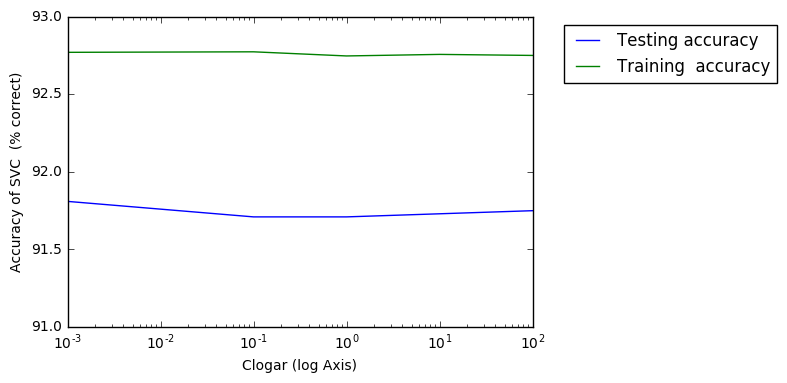

In [7]:
plt.semilogx(Carr,MTxAcc,label="Testing accuracy")
plt.semilogx(Carr,MTrAcc,label="Training  accuracy")
plt.xlabel('Clogar (log Axis)')
plt.legend(bbox_to_anchor=(1.05, 1), loc=2)
plt.ylabel('Accuracy of SVC  (% correct)')
plt.ylim((91,93))
plt.show()

In [1]:
# iii) (15) Change the penalty parameter to 'l1' and repeat the experiments you did in i) and ii).
# Comment on the results.

def fuclinearSVCl1(K):
    # train the SVC with the given c with the other default parameters
    stime = timeit.default_timer()
    Lsvcl1 = LinearSVC(penalty='l1',C=K, dual=False) 
    
    Lsvcl1.fit(Trd, Trl)
        
    Trtime = timeit.default_timer() - stime 
    
        
    # After the SVC is trained we use it to get the predictions for the test and training set 
    
    predtx = Lsvcl1.predict(Txd) #test set  
    predtr = Lsvcl1.predict(Trd) #traing set 

    # Calculating the training and testing Accuracy
    TxAcc  =   100*metrics.accuracy_score(predtx,Txl) # accuracy for testing by comparing the pred with the labels
    TrAcc  = 100*metrics.accuracy_score(predtr,Trl) # accuracy for training by comparing the pred with the labels
    
    # Returning the training acc and testing acc required in the question
    return TrAcc,TxAcc,Trtime 


Carr = np.array([0.001, 0.1, 1, 10, 100])
# Taking log for the values of c
Clogar = np.log10(Carr)

MTrAccl1=[]
MTxAccl1=[]
MTrtimel1=[]
for i in Carr :
    Acctr, Acctx,ttime = fuclinearSVCl1(i)
    MTxAccl1.extend([Acctx])
    MTrAccl1.extend([Acctr])
    MTrtimel1.extend([ttime])
    print('Training Accuracy')
    print(Acctr)
    print('Testing Accuracy')
    print(Acctx)
    
    
plt.semilogx(Carr,MTxAccl1,label="Testing accuracy")
plt.semilogx(Carr,MTrAccl1,label="Training  accuracy")
plt.legend(bbox_to_anchor=(1.05, 1), loc=2)
plt.xlabel('Clogar (log Axis)')
plt.ylabel('Accuracy of SVC for penalty =l1  (% correct)')
plt.show()

print(MTrtimel1)



NameError: name 'np' is not defined